<a href="https://colab.research.google.com/github/LeMinhTruong16/AI/blob/main/w10_sifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

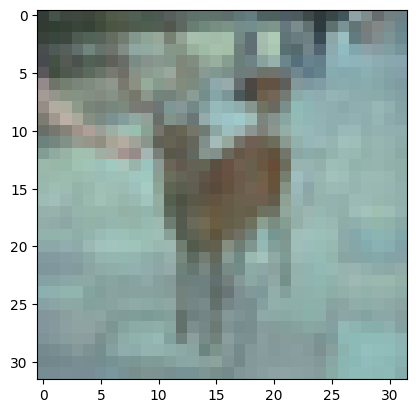

This image is: [[[ 50  59  53]
  [ 70  83  75]
  [ 61  71  65]
  ...
  [103 109 110]
  [114 128 130]
  [108 128 134]]

 [[ 50  59  49]
  [ 49  63  51]
  [ 53  64  53]
  ...
  [131 135 134]
  [124 141 143]
  [107 133 141]]

 [[ 57  65  58]
  [ 57  70  61]
  [ 60  71  63]
  ...
  [128 140 141]
  [125 148 150]
  [109 138 146]]

 ...

 [[117 138 141]
  [120 141 143]
  [125 146 148]
  ...
  [144 190 187]
  [143 190 186]
  [140 181 180]]

 [[114 135 139]
  [115 136 140]
  [117 138 142]
  ...
  [142 186 184]
  [139 184 181]
  [137 177 175]]

 [[120 140 147]
  [120 140 147]
  [122 142 149]
  ...
  [142 184 182]
  [141 185 182]
  [135 172 172]]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               1573376   
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
   

In [7]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# display an image from the dataset
plt.imshow(x_train[153])
plt.show()
print('This image is:', x_train[153])

# create a sequential model
model = Sequential()

# flatten the input
model.add(Dense(512, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# add the output layer with softmax activation
model.add(Dense(10, activation='softmax'))

# print model summary
model.summary()

# preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)  #lỗi rất dễ xảy ra
y_test = to_categorical(y_test, 10)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train.reshape((50000, 32*32*3)), y_train, epochs=20, batch_size=128)

# evaluate the model
test_loss, test_acc = model.evaluate(x_test.reshape((10000, 32*32*3)), y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

In [8]:
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

model = Sequential()
model.add(Dense(2000, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation = 'softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2000)              6146000   
                                                                 
 dense_19 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_20 (Dense)            (None, 100)               100100    
                                                                 
Total params: 8,247,100
Trainable params: 8,247,100
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 68s 172ms/step - loss: 4.2463 - accuracy: 0.0690
Epoch 2/10
391/391 [==============================] - 75s 192ms/step - loss: 3.7213 - accuracy: 0.1310
Epoch 3/10
391/391 [======================

In [22]:
model.save('My_model.h5')

In [26]:
from google.colab import drive
drive.mount('/content/drive')
!cp My_model.h5 "/content/drive/MyDrive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


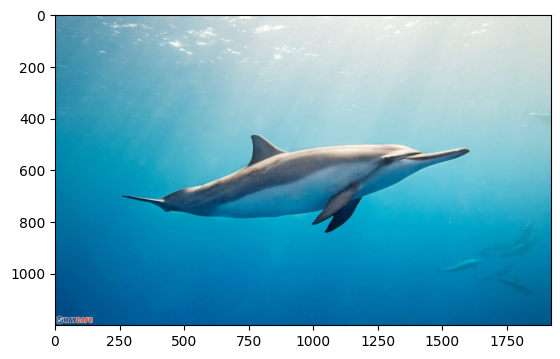

NameError: ignored

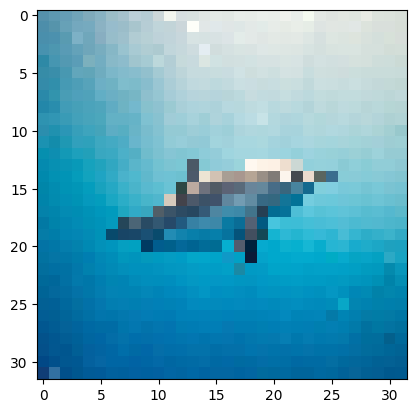

In [36]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/My_model.h5')

# Load image
import matplotlib.pyplot as plt
from keras.utils import load_img,img_to_array
img=load_img('/content/drive/MyDrive/heo.jpg')
plt.imshow(img)
plt.show()
img=load_img('/content/drive/MyDrive/heo.jpg',target_size=(32,32))
plt.imshow(img)

# Make prediction
prediction = model.predict(image_array)
class_index = np.argmax(prediction)
